# Drive Mount, Installations and Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install the ultralytics package using pip
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
import yaml
from IPython.display import Image

# MODEL INITIALISATION AND TRANSFER LEARNING + TRAINING

In [ ]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)


100%|██████████| 6.73M/6.73M [00:00<00:00, 71.7MB/s]


In [ ]:
# this is the YAML file
%cat /content/drive/MyDrive/yolosegmentation/data.yaml

train: /content/drive/MyDrive/yolosegmentation/water/train/images
val: /content/drive/MyDrive/yolosegmentation/water/valid/images
test: /content/drive/MyDrive/yolosegmentation/water/test/images

nc: 1
names: ['Water']

roboflow:
  workspace: thejagstudio-eymar
  project: textilev3
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/thejagstudio-eymar/textilev3/dataset/1

In [ ]:
# define number of classes based on YAML

with open("/content/drive/MyDrive/yolosegmentation/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/yolosegmentation/results"
#Define subdirectory for this specific training
#name = "20_epochs-" #note that if you run the training again, it creates a directory: 20_epochs-2
name = "3_epochs-" #for tutorial

In [ ]:
# # Train the model
# results = model.train(data='/content/drive/MyDrive/yolosegmentation/data.yaml',
#                       project=project,
#                       name=name,
#                       epochs=300,
#                       #patience=0, #I am setting patience=0 to disable early stopping.
#                       batch=1,
#                       imgsz=640)

# RESULTS VISULAISATION

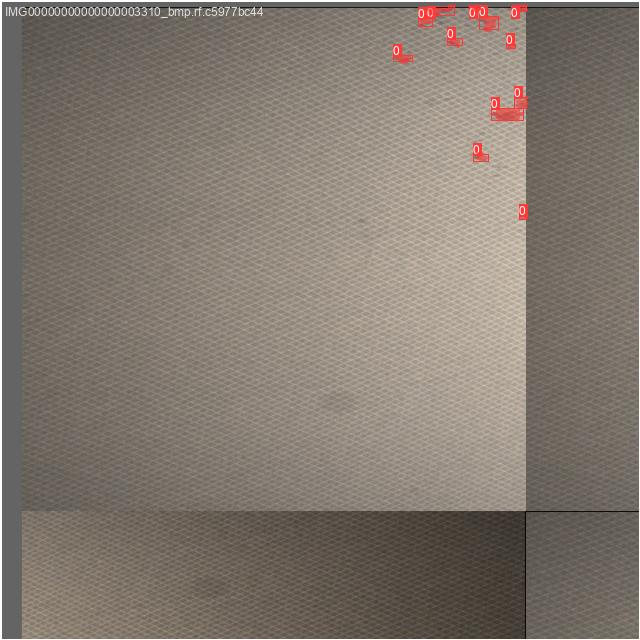

In [ ]:
Image("/content/drive/MyDrive/yolosegmentation/results/3_epochs-3/train_batch2.jpg")

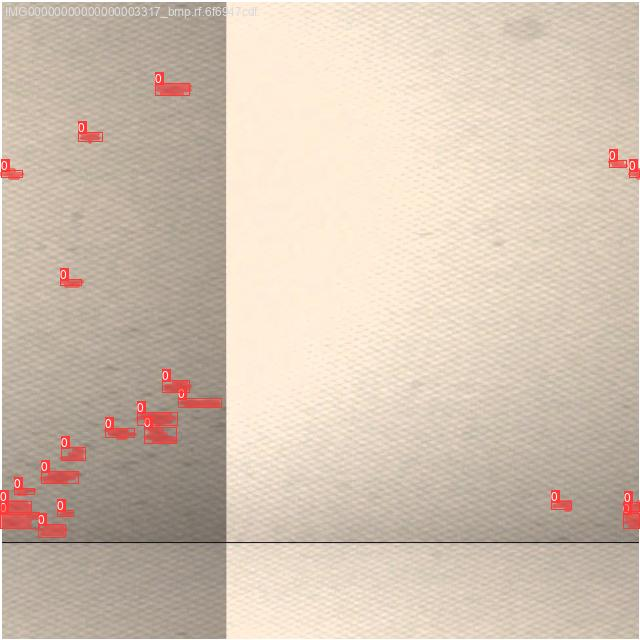

In [ ]:
Image("/content/drive/MyDrive/yolosegmentation/results/3_epochs-3/train_batch1.jpg")

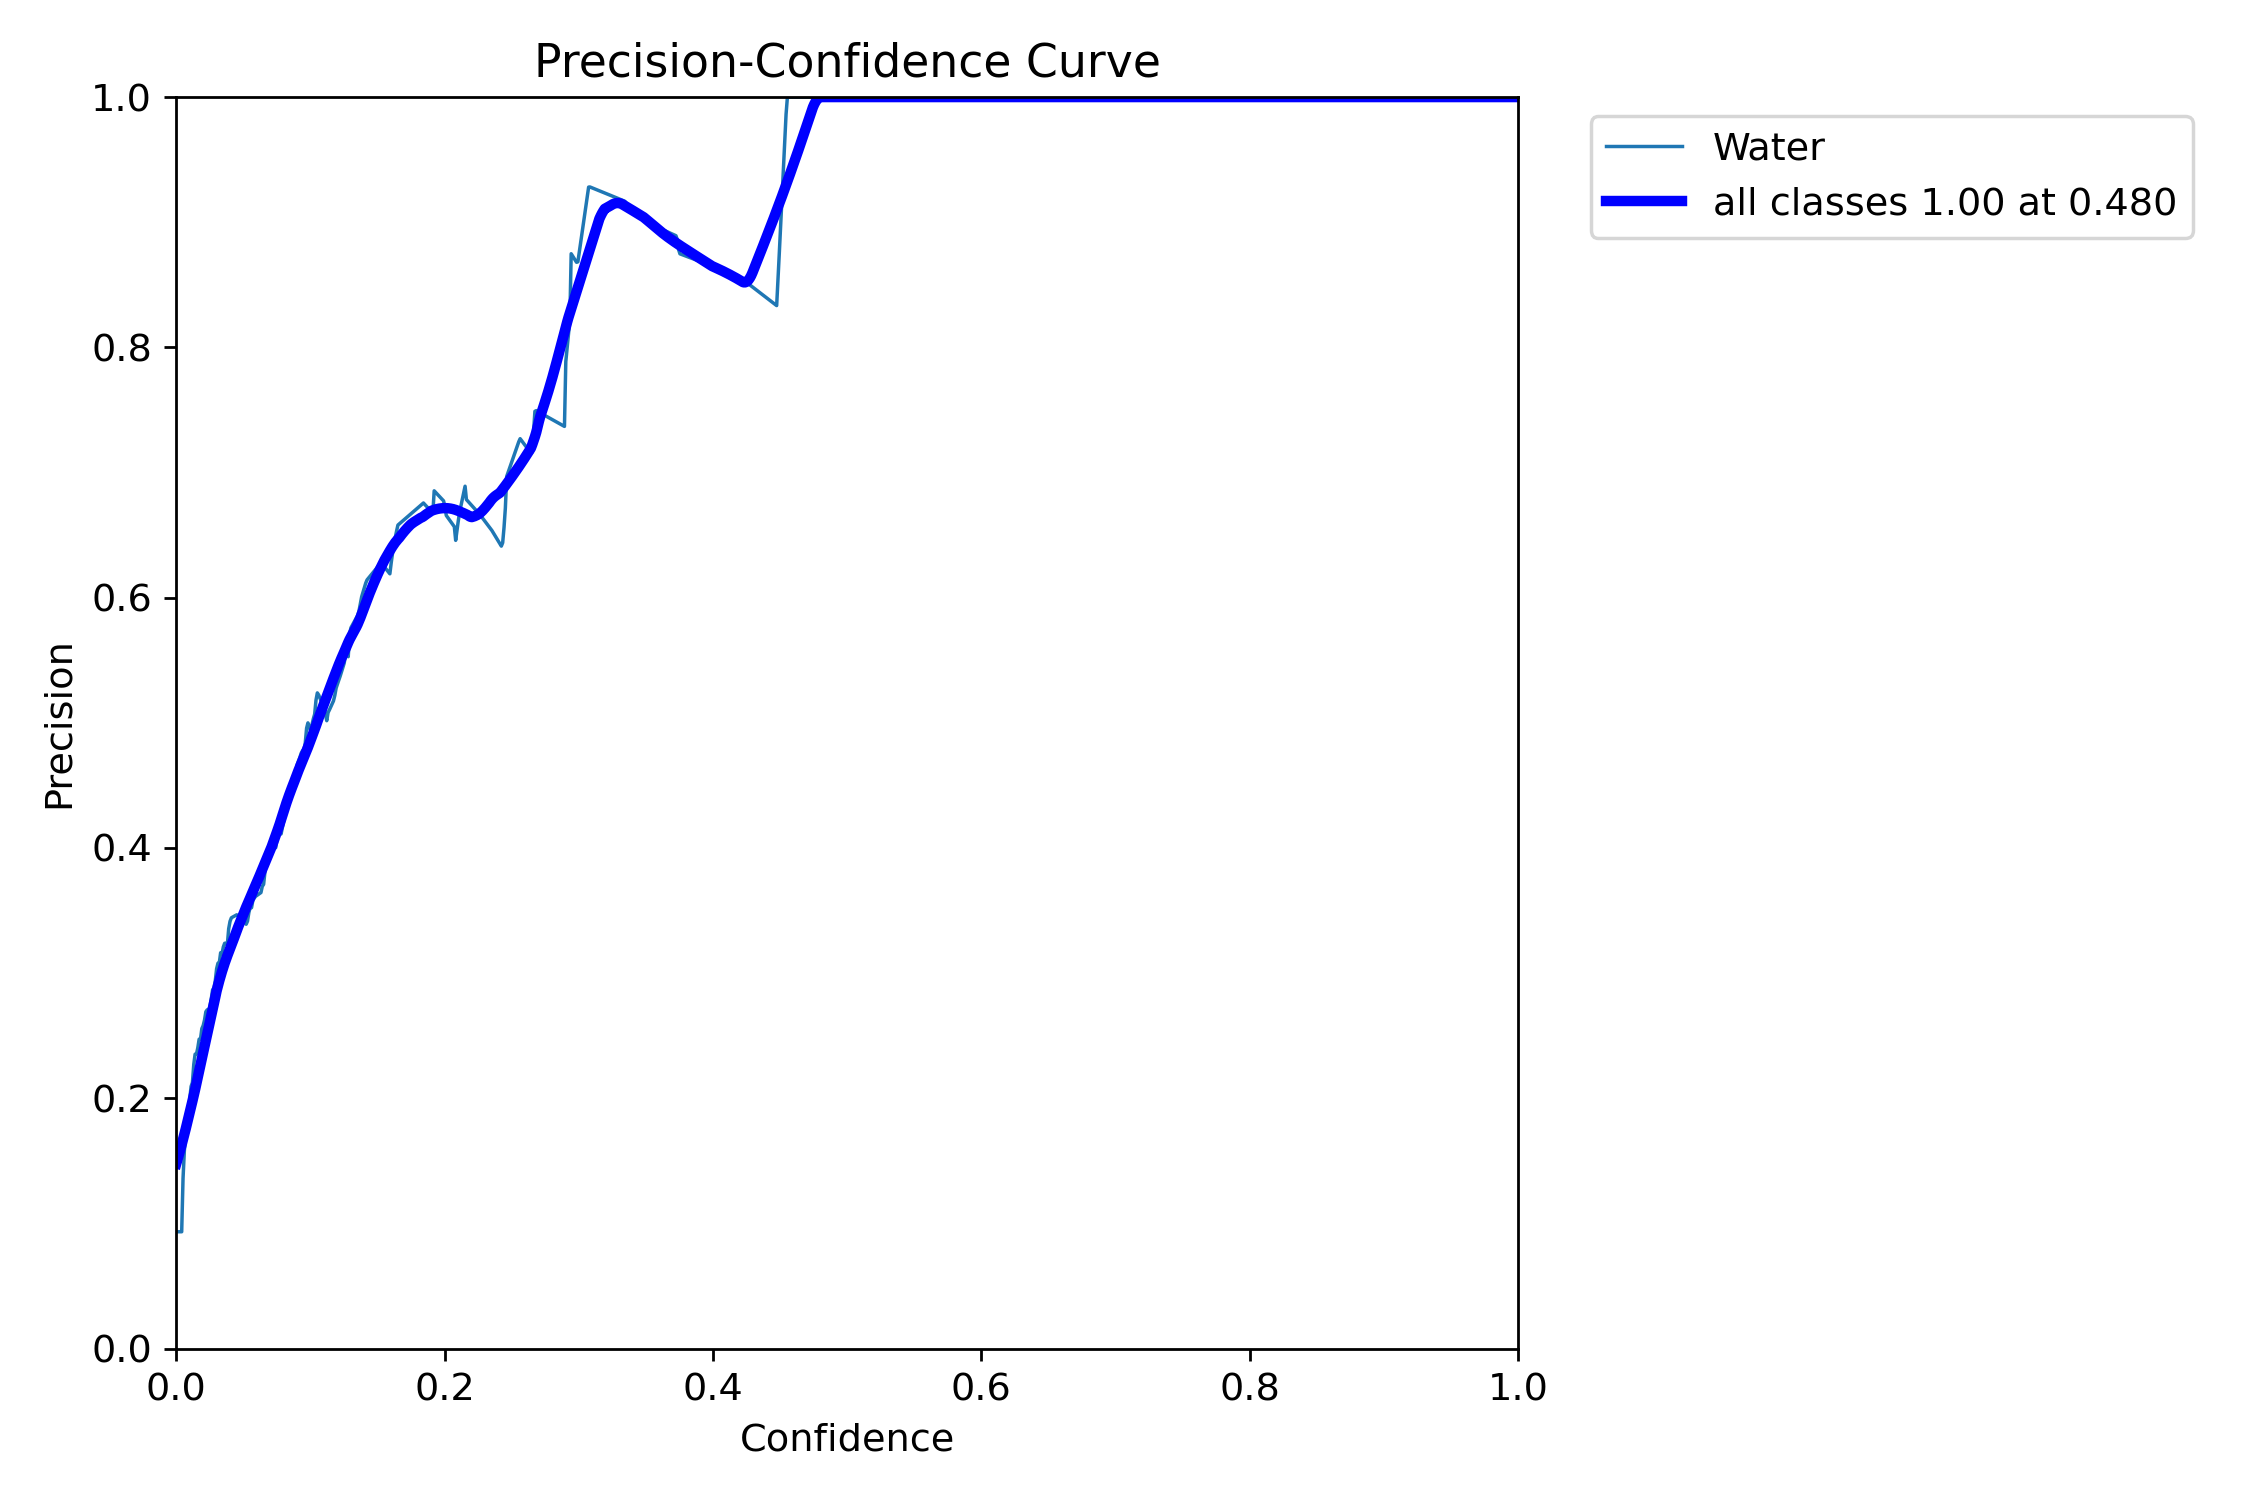

In [ ]:
Image("/content/drive/MyDrive/yolosegmentation/results/3_epochs-3/MaskP_curve.png")

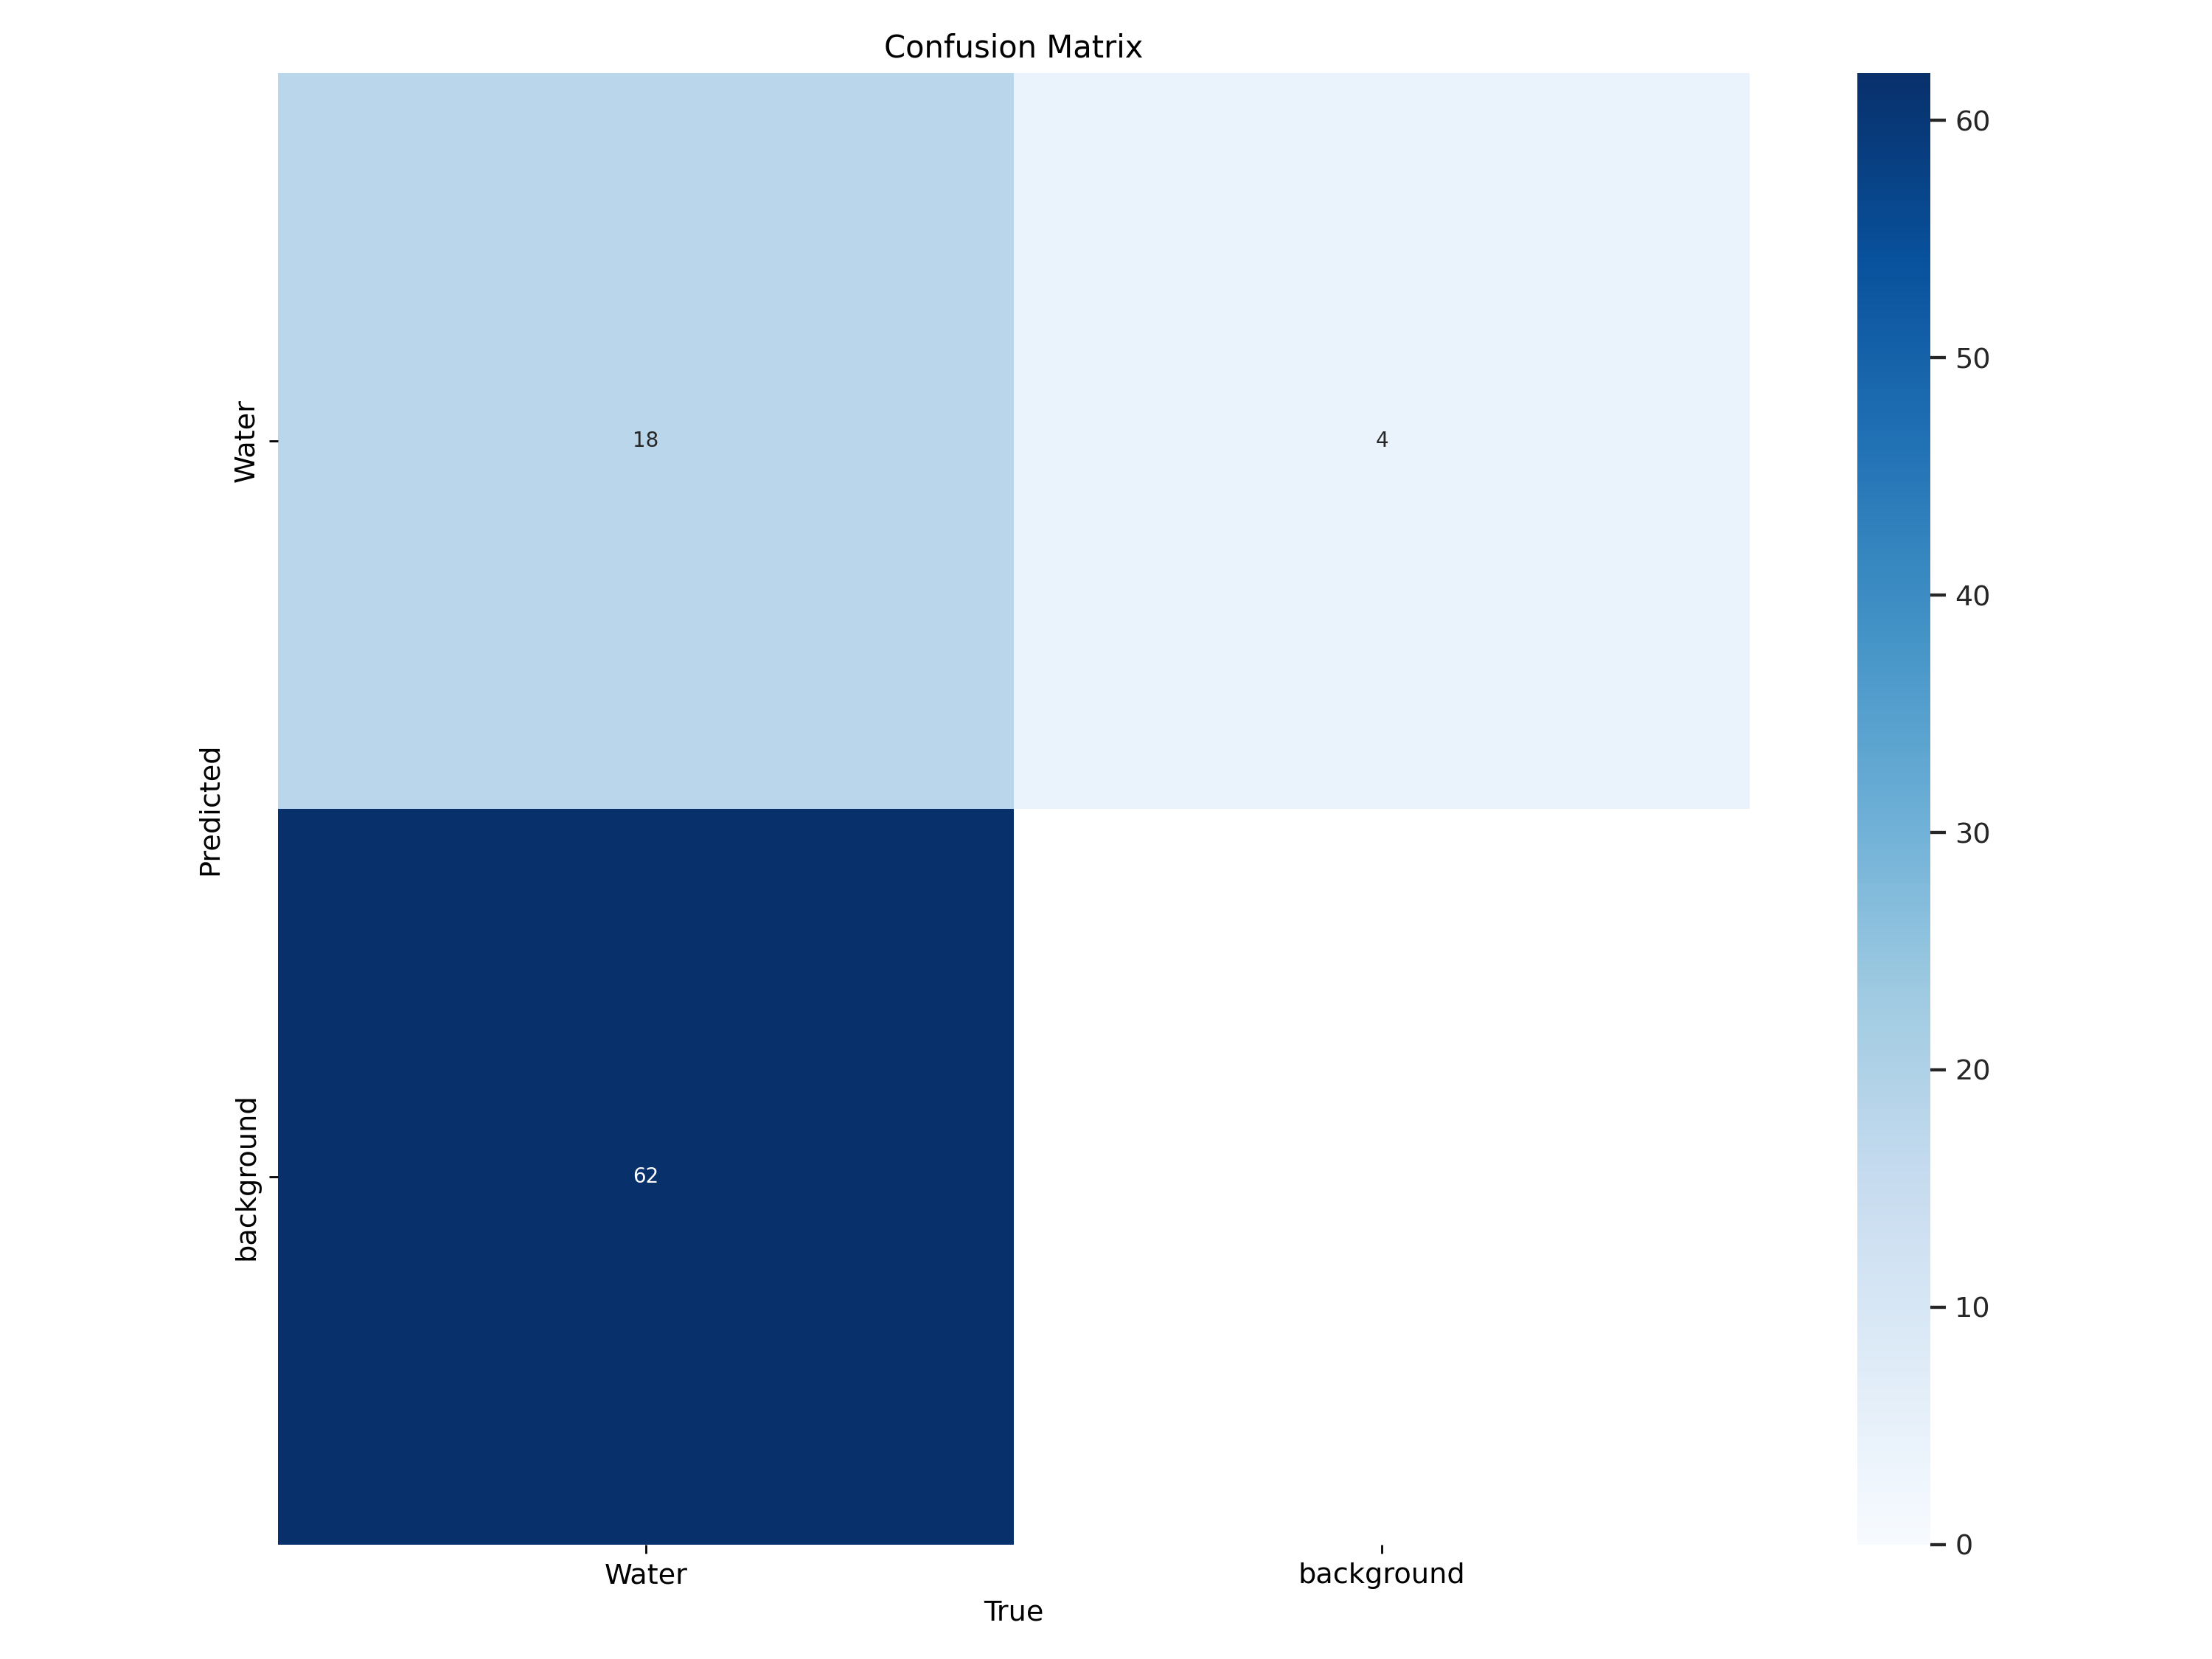

In [ ]:
Image("/content/drive/MyDrive/yolosegmentation/results/3_epochs-3/confusion_matrix.png")

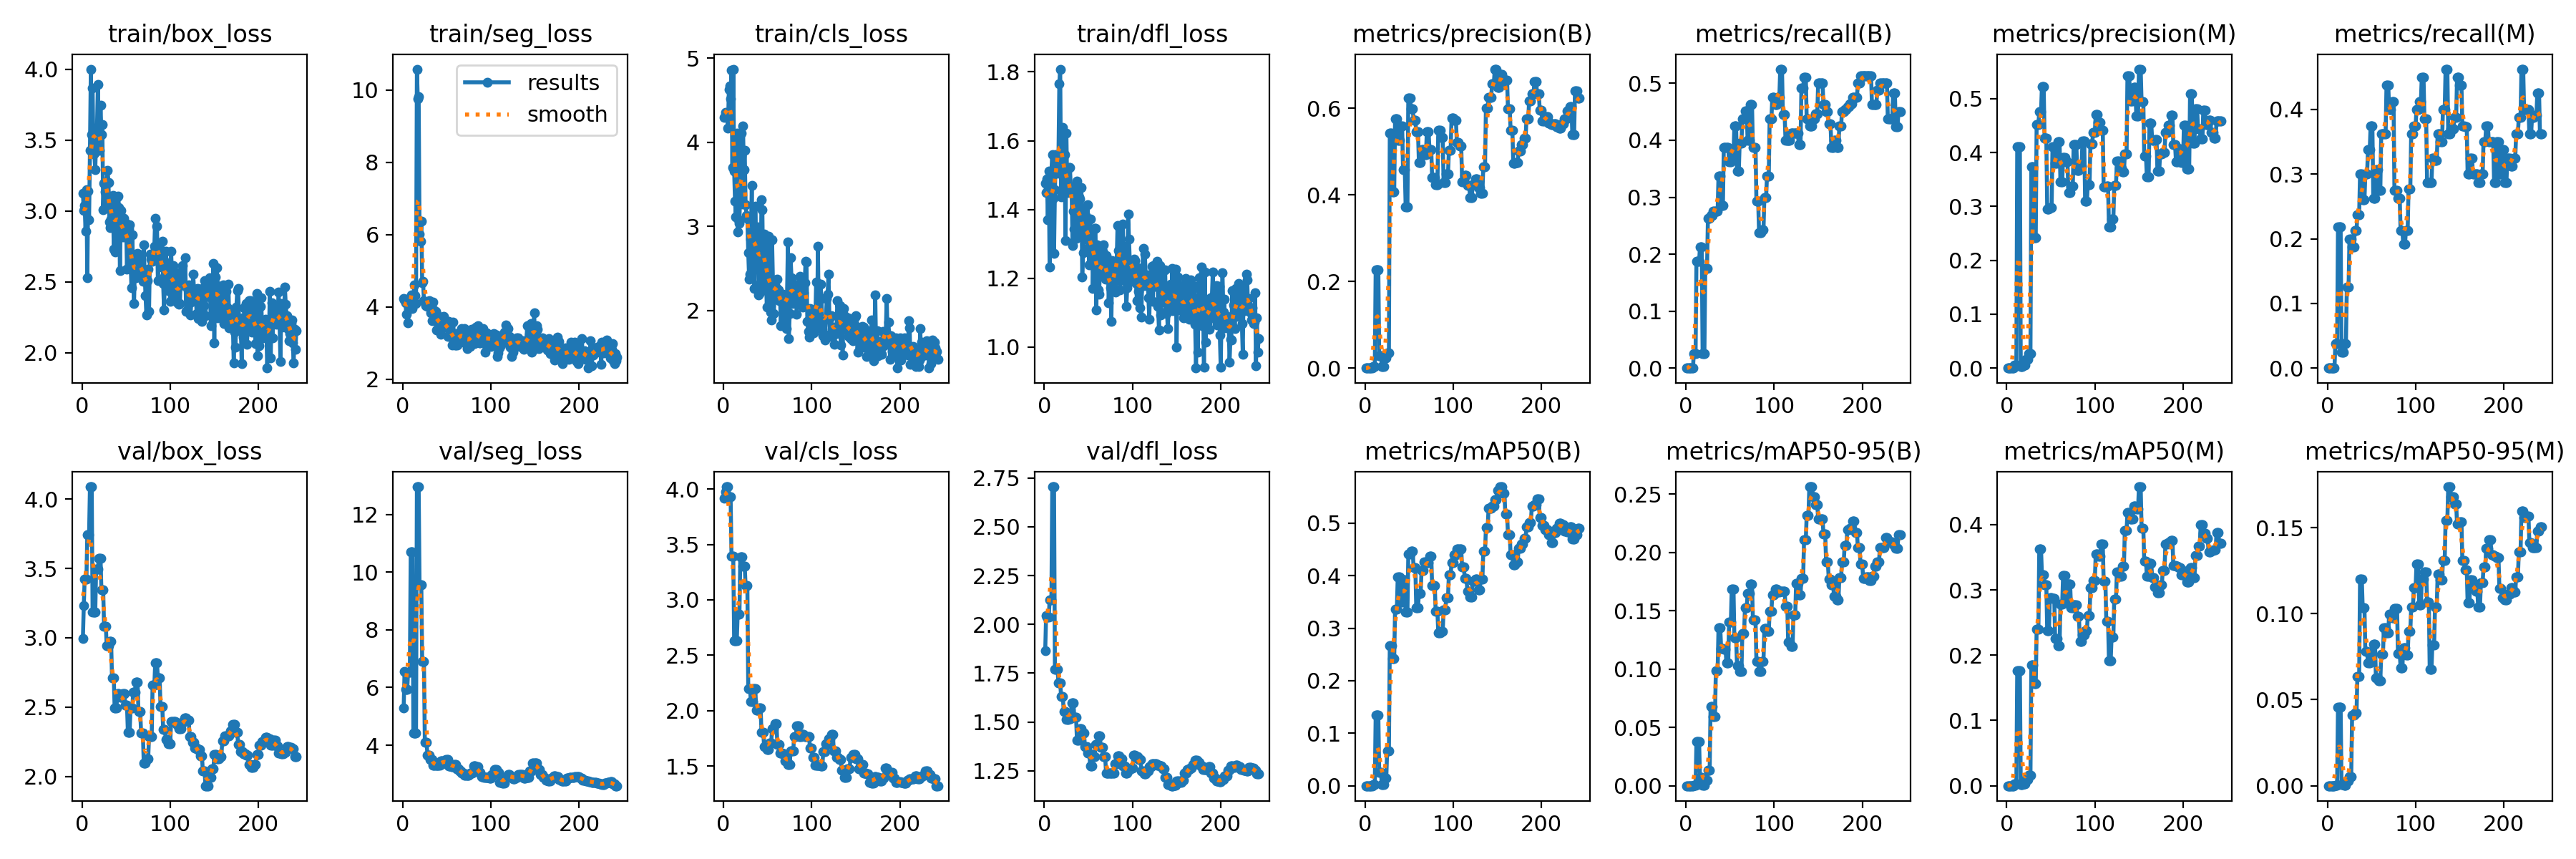

In [ ]:
Image("/content/drive/MyDrive/yolosegmentation/results/3_epochs-3/results.png")

# PREDICTION

In [ ]:
custom_model = YOLO('/content/drive/MyDrive/yolosegmentation/results/3_epochs-3/weights/best.pt')#MODEL DECLARATION

In [ ]:
img="/content/drive/MyDrive/yolosegmentation/water/test/images/IMG00000000000000003313_bmp.rf.91174e81c8f26f363ee10d4c16f2b33c.jpg"

In [ ]:
resim=custom_model.predict(img,conf=0.01)


image 1/1 /content/drive/MyDrive/yolosegmentation/water/test/images/IMG00000000000000003313_bmp.rf.91174e81c8f26f363ee10d4c16f2b33c.jpg: 640x640 112 Waters, 379.3ms
Speed: 3.7ms preprocess, 379.3ms inference, 968.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
tested='/content/drive/MyDrive/yolosegmentation/water/test/images'

In [ ]:
files = os.listdir(tested)#TO PREDICT FOR ALL THE IMAGES IN TEST FOLDER
num_files = len(files)
num_files

2

In [ ]:
folder_path = '/content/drive/MyDrive/yolosegmentation/water/test/images'

# Initialize an empty list to store image paths
image_paths = []

# Iterate through all files in the directory
for filename in os.listdir(folder_path):
    # Check if the file is an image file
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, filename)
        # Append the image path to the list
        image_paths.append(image_path)

# Print the list of image paths
print(image_paths)

['/content/drive/MyDrive/yolosegmentation/water/test/images/IMG00000000000000003302_bmp.rf.4eeda1c33014384965465ab321516c37.jpg', '/content/drive/MyDrive/yolosegmentation/water/test/images/IMG00000000000000003313_bmp.rf.91174e81c8f26f363ee10d4c16f2b33c.jpg']


In [ ]:

new_results=custom_model.predict(image_paths,conf=0.01)  #Adjust conf threshold
# RESULTS FOR ALL THE IMAGES IN TEST


0: 640x640 29 Waters, 1: 640x640 112 Waters, 619.2ms
Speed: 3.8ms preprocess, 309.6ms inference, 495.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
new_results[0]

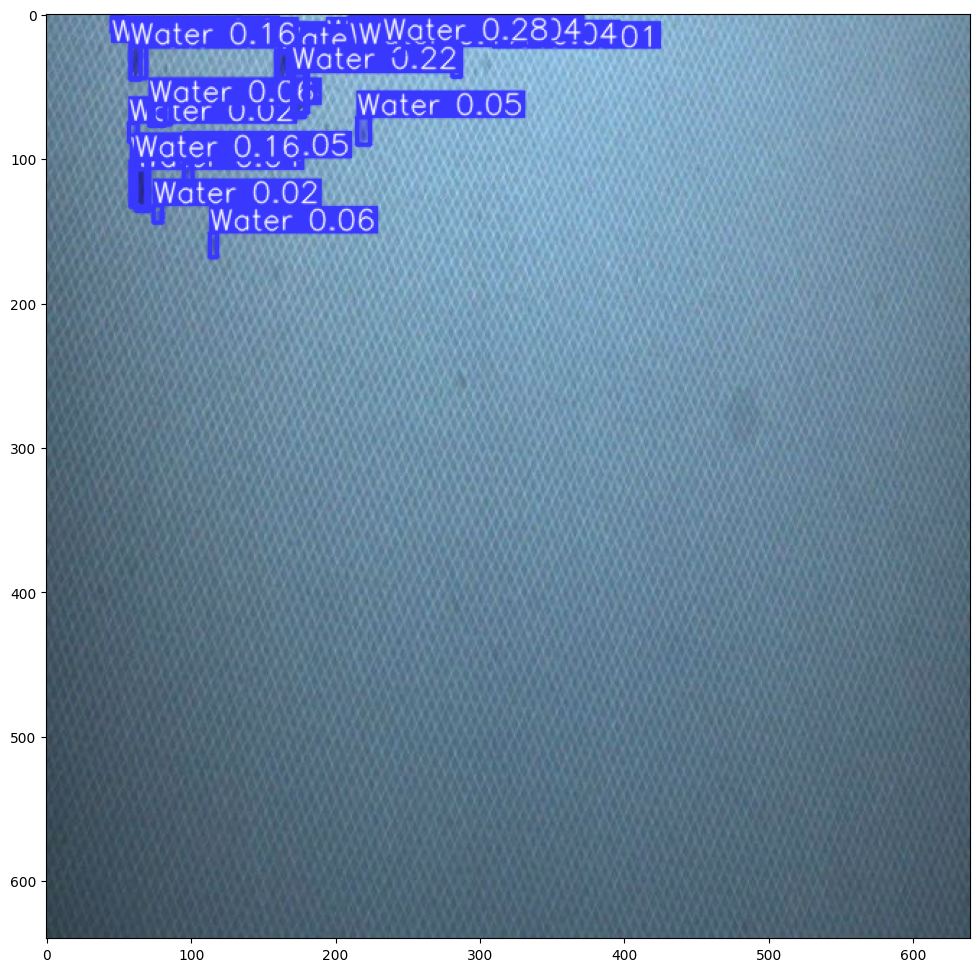

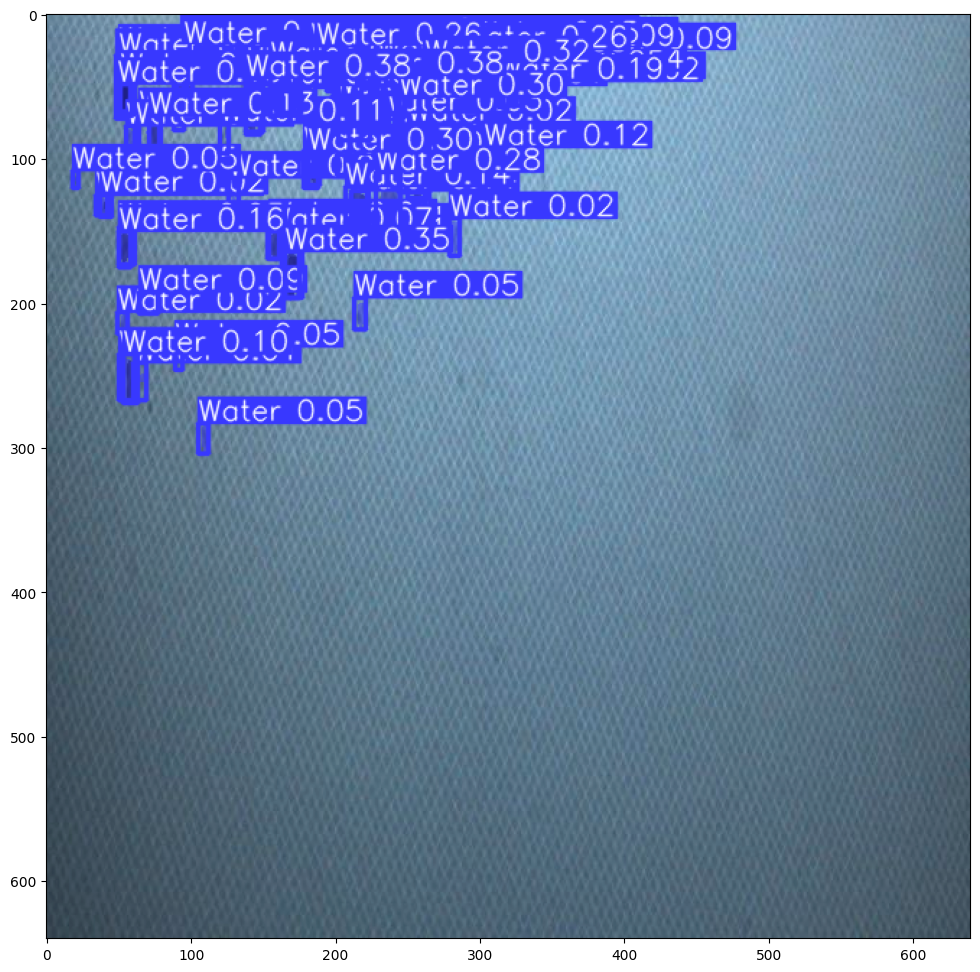

In [ ]:
for i in range(num_files):
  new_result_array=new_results[i].plot()
  plt.figure(figsize=(12,12))
  plt.imshow(new_result_array)

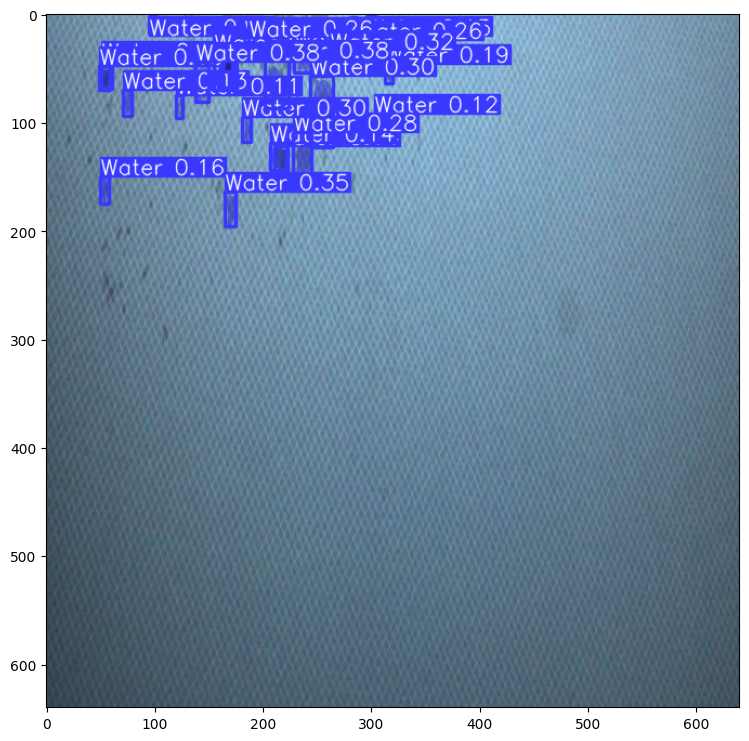

In [ ]:
new_result_array = newresults[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(new_result_array)

## EXTRACTING BOUNDING BOXES  

### **extracting bounding polygons**
use Masks.xyn for normalised segments
use Masks.xy for pixel segments

In [ ]:
out=new_results[0]

In [ ]:
out.masks.xyn

In [ ]:
#get data about masks
extracted_masks=out.masks.data
extracted_masks

In [ ]:
extracted_masks.shape

torch.Size([29, 640, 640])

In [ ]:
#push to cpu
mask_arr=extracted_masks.cpu().numpy()

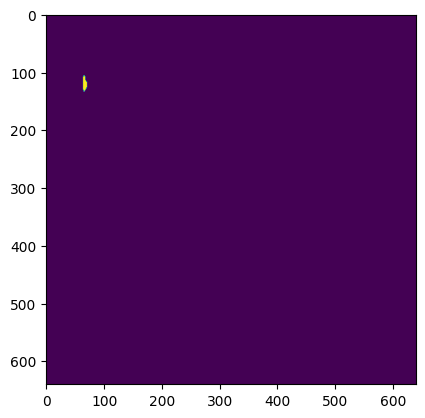

In [ ]:
plt.imshow(mask_arr[5])

# WITHOUT LABELS

In [ ]:
! yolo task=segment mode=predict model='/content/drive/MyDrive/yolosegmentation/results/3_epochs-3/weights/best.pt' source="/content/drive/MyDrive/yolosegmentation/water/test/images/IMG00000000000000003313_bmp.rf.91174e81c8f26f363ee10d4c16f2b33c.jpg" show_labels=False show_conf=False show_boxes=False conf=0.01

Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

image 1/1 /content/drive/MyDrive/yolosegmentation/water/test/images/IMG00000000000000003313_bmp.rf.91174e81c8f26f363ee10d4c16f2b33c.jpg: 640x640 112 Waters, 458.1ms
Speed: 17.5ms preprocess, 458.1ms inference, 754.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


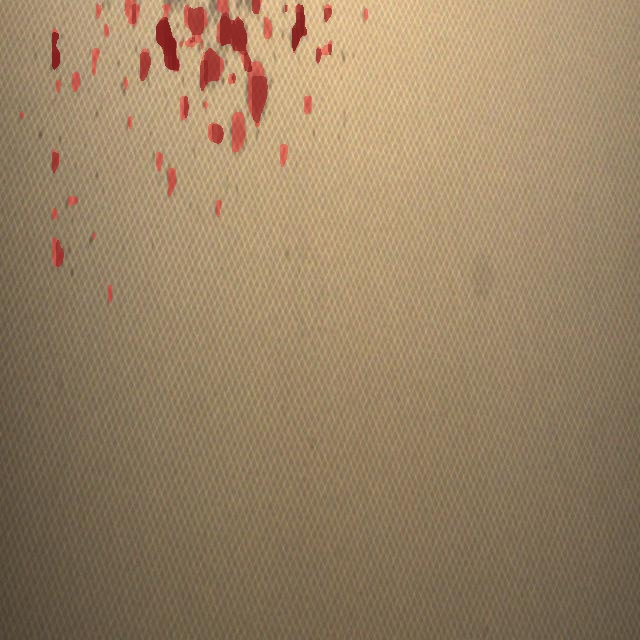

In [ ]:
Image('/content/drive/MyDrive/yolosegmentation/runs/segment/predict6/IMG00000000000000003313_bmp.rf.91174e81c8f26f363ee10d4c16f2b33c.jpg')